# Building LLM applications: Notebook 05

# LangGraph

## Initialize

In [1]:
import os
import dotenv

from IPython.display import Image, display

from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

from langchain_ollama import ChatOllama

In [2]:
MODEL = 'llama3.2:3b-instruct-fp16'

In [3]:
# Read fro `.env` file
dotenv.load_dotenv()

OLLAMA_URL = os.getenv('OLLAMA_URL')
print(f"Using Ollama server: {OLLAMA_URL if OLLAMA_URL else 'local'}")

Using Ollama server: http://kqrw311-g5-12xlarge-a.img.astrazeneca.net:8080


## Graph

### Step 1: Define the `state` (i.e. data that is passed to each node)

In [4]:
# The MessagesState definition is roughly equivalent to the following:
#
# class MessagesState(TypedDict):
#     messages: list[AnyMessage]
#

state = MessagesState()

### Step 2: Define some nodes

In [5]:
def node_1(state):
    print("Node 1")
    return {"messages": "node_1"}

def node_2(state):
    print("Node 2")
    return {"messages": "node_2"}

### Step 3: Create a graph and add the nodes

In [6]:
# Build graph
builder = StateGraph(MessagesState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

### Step 4: Add the edges

In [7]:
# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

### Step 5: Compile the graph

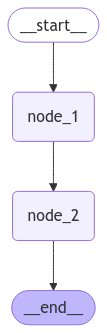

In [8]:
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

### Run it

In [9]:
ret = graph.invoke({"messages": "START"})

Node 1
Node 2


In [10]:
# The state is returned, we show the messages
for m in ret["messages"]:
    m.pretty_print()

================================ Human Message =================================

START
================================ Human Message =================================

node_1
================================ Human Message =================================

node_2
